In [ ]:
# This plots LBTI Phasecam visibility limits, based on tests with a few stars

# Created 2019 Apr. 12 by E.S.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.special
import pandas as pd

In [2]:
masec_per_rad = np.divide(1000.*180.*3600.,np.pi)

In [3]:
# diameters of some stars of interest; note that there are further complications
# like limb-darkening, flattening, etc.-- but these values are sufficient for 
# our purposes

# Arcturus diameter (H-band, IOTA; Lacour+ 2008 A&A 485, 561-570)
diam_arcturus = 21 # mas

# Altair diameter (H/K-bands, VLTI/VINCI; de Souza+ 2005 A&A 442, 567–578)
diam_altair = 3.2

# Vega diameter (K'-band, CHARA; Aufdenberg+ 2006 645:664–675; also consistent 
# with visible measurements by Quirrenbach+ 1996 1996A&A...312..160Q)
diam_vega = 3.3

# beta And diameter (UD B/V/R/I; JMMC)
diam_betaAnd = 13

In [4]:
star_data = pd.read_csv("data/interferometry_datasets.csv")

In [5]:
def vis2_fcn_theta(theta_array, wavel_um, baseline_m):
    '''
    This plots the visibility curve as function of stellar diameter (as a simple circle), 
    depending on wavelength and baseline
    (e.g., Eqn. 2.29 in Lawson, ed., 1999, Principles of Long Baseline Stellar Interferometry)
    
    INPUTS:
    theta_array: array of angular diameters
    wavel: wavelength in um
    baseline: baseline in m
    
    OUTPUTS:
    '''
    z_array = np.divide(np.pi*theta_array*baseline_m,wavel_um) # pi*theta*baseline_perp/wavel
    
    z_array = np.divide(np.multiply(z_array,1e6),masec_per_rad) # convert to radians
    
    vis = np.divide(2*scipy.special.jv(1, z_array),z_array)
    vis2 = np.multiply(vis,np.conj(vis))
    
    return vis2

In [6]:
def vis2_fcn_baseline(theta, wavel_um, baseline_m_array):
    '''
    This is a function to check by comparing with the Fig. 2 in Berger, 
    Introduction to Visibility Modeling
    
    OUTPUTS:
    '''
    z_array = np.divide(np.pi*theta*baseline_m_array,wavel_um) # pi*theta*baseline_perp/wavel
    
    z_array = np.divide(np.multiply(z_array,1e6),masec_per_rad) # convert to radians
    
    vis = np.divide(2*scipy.special.jv(1, z_array),z_array)
    vis2 = np.multiply(vis,np.conj(vis))
    
    return vis, vis2

In [7]:
# find visibilities for Phasecam in Ks-band

theta_mas = np.arange(0,60)
ks_band = vis2_fcn_theta(theta_array=theta_mas, wavel_um=2.15, baseline_m=14.4)

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


<Figure size 432x288 with 0 Axes>

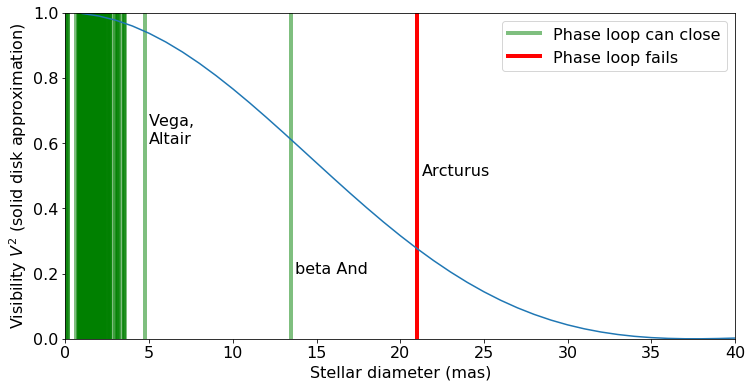

In [22]:
plt.clf()

fig, ax = plt.subplots(figsize=(12,6))

[ax.axvline(i, linestyle = '-', linewidth = 4, color="green", alpha=0.5) for i in star_data["ud_k_mas"]]
ax.axvline([-1000], linestyle = '-', linewidth = 4, color="green", alpha=0.5, label="Phase loop can close")
ax.axvline(diam_arcturus, linestyle = '-', linewidth = 4, color="red", label="Phase loop fails")
#ax.axvline(diam_altair, linestyle = '--', linewidth = 4, color="green")
#ax.axvline(diam_vega, linestyle = '--', linewidth = 4, color="green")
#ax.axvline(diam_betaAnd, linestyle = '--', linewidth = 4, color="green")
ax.plot(theta_mas,ks_band)
ax.set_xlim([0,40])
ax.set_ylim([0,1])
ax.set_ylabel("Visibility $V^{2}$ (solid disk approximation)")
ax.set_xlabel("Stellar diameter (mas)")
ax.annotate('Arcturus', xy=(diam_arcturus, 1), xytext=(diam_arcturus+0.3, 0.5))
#ax.annotate('Altair', xy=(diam_altair, 1), xytext=(diam_altair+1, 0.5))
ax.annotate('Vega,\nAltair', xy=(diam_vega, 1), xytext=(diam_vega+1.7, 0.6), fontsize=16)
ax.annotate('beta And', xy=(diam_betaAnd, 1), xytext=(diam_betaAnd+0.7, 0.2))
'''
ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)
plt.show()


plt.annotate()
plt.plot(theta_mas,k_band)

'''
matplotlib.rcParams.update({'font.size': 16})
ax.legend()
#plt.title("Visibilities of stars as seen by Phasecam\n(green: can close phase loop; red: cannot close)")
plt.savefig("phasecam_visibilities.pdf")